# Chapter 1: Molecular Dynamics

<img src="ch01_fig01.jpg" alt="title" width="600px" />

## Motivation

**Molecular dynamics**: describes the interaction among objects based on Newton's laws.

**Key advantages**:
- Molecular dynamics can be made complex at will.
- There are codes for simulating millions of particles.
- Often done in parallel computing / with supercomputers.


### Physics

<img src="MD_water.gif" alt="title" width="600px" />

- gas-liquid-solid states of matter

- hydrodynamic effects and interaction 

- polymer dynamics

### Material Sciences

<img src="liquid_crystals.png" alt="title" width="600px" />

- structure and properties of materials

- liquid crystal phase transitions

- polymer glasses

### Biophysics

<img src="protein_dynamics.gif" alt="title" width="600px" />

- transport/diffusion through membranes

- protein folding

- DNA/RNA studies

- bacteria and virus study

### Pharmaceutics

<img src="drug_design.gif" alt="title" width="600px" />

- drugs design

- vaccine research

## Application example: AI-driven Molecular Dynamics to study SARS-CoV-2 spike protein


[AI-driven multiscale simulations illuminate mechanisms of SARS-CoV-2 spike dynamics](https://journals.sagepub.com/doi/10.1177/10943420211006452)

<img src="Cov2-NAMD.jpg" alt="title" width="600px" />

## Newton's Laws

$$F = m a$$

is equivalent to

$$
    \left\{
    \begin{array}{lcl}
        \displaystyle \frac{{\rm d}{r(t)}}{{\rm d}t} & = & v(t) \\[10pt]
        \displaystyle \frac{{\rm d}{v(t)}}{{\rm d}t} & = & \displaystyle \frac{F}{m} \\[10pt]
        r(0) & = & r_0 \\[5pt]
        v(0) & = & v_0 \\[5pt]
    \end{array}
    \right.
$$


## Discretization

In the analytical description the time is a **continuous** variable. 
In simulation the description of the system is necessarily **discrete**  (note that also in experiments we have a discrete description: for example, think at the finite frame rate of the camera when you shot a movie)

$$
    \begin{array}{ccc}
        t_0 & \leftrightarrow & x_0 \\
        t_1 & \leftrightarrow & x_1 \\
        t_2 & \leftrightarrow & x_2 \\
        \vdots &  & \vdots \\
        t_n & \leftrightarrow & x_n \\
        t_{n+1} & \leftrightarrow & x_{n+1} \\
        \vdots &  & \vdots \\[10pt]
    \end{array}
$$


## Euler's algoritm


$$
    \left\{
    \begin{array}{ccl}
        \displaystyle x_{n+1} 
        & = & 
        \displaystyle x_n + v_n \Delta t 
        \\[5pt]
        \displaystyle v_{n+1} 
        & = & 
        \displaystyle v_n + \frac{F_n}{m} \Delta t \\[5pt]
    \end{array}
    \right.
$$

which is the **finite difference intergation scheme of the Euler algorithm**

We of course have to consider the initial condition 
$$
    \left\{
    \begin{array}{ccl}
        \displaystyle x_{0} 
        & = & 
        \displaystyle x0
        \\[5pt]
        \displaystyle v_{0} 
        & = & 
        \displaystyle v0 \\[5pt]
    \end{array}
    \right.
$$
from which we start.

The force is either given explicitly or it is determined from the potential energy U (in the case of a conservative force) in the following way:

$$
    F(r) = - \nabla U(r),
$$

It might be that we need to determine the force also by finite difference:

$$
    F_n = F(r_n) = - \frac{U(r_n+\Delta r) - U(r_n-\Delta r)}{2 \Delta r}
$$


## Harmonic oscillator

The harmonic oscillator is a simple system that captures the behavior a wide class of phenomena.
In physics, it is often used as a model system. The analytical solution of this model is known.
This is why we start and test our numerical methods on the harmonic oscillator.
In general, before trusting any numerical method **we must test how it performs in known cases**, to understand its reach and limitations.

### Mathematical formulation of the harmonic oscillator in 1 dimension

A body with mass *m* attached to a spring with elastic constant *k* performs the typical harmonic oscillatory motion.
The force acting on the mass is proportional to the displacement from the equilibrium position *r* in the following manner:

$$
    F(r) = -k r
$$

Note that in the model *there is no dissipation*, i.e., no friction force is considered, so we expect that our system will oscillate forever. 

Therefore, the equations for *r* and *v* are:

$$
    \left\{
    \begin{array}{lcl}
        \displaystyle \frac{{\rm d}{r(t)}}{{\rm d}t} & = & v(t) \\[10pt]
        \displaystyle \frac{{\rm d}{v(t)}}{{\rm d}t} & = & \displaystyle -\frac{k}{m} r \\[10pt]
        r(0) & = & r_0 \\[5pt]
        v(0) & = & v_0 \\[5pt]
    \end{array}
    \right.
$$


### Analytical solution

The analytical solution for the harmonic oscillator can be found in any  book of fundamental physics. We provide it here for convenience. It is:

$$
    \left\{
    \begin{array}{lcl}
        r(t) & = & A \cos(\omega t + \phi) \\[10pt]
        v(t) & = & - \omega A \sin(\omega t + \phi)
    \end{array}
    \right.
$$

where $\omega = \sqrt{\frac{k}{m}}$ is the angular frequency, 
$A = \sqrt{r_0^2 + (v_0/\omega)^2}$ is the amplitude
and $\phi = {\rm atan2} \left( -\frac{v_0}{\omega}, r_0 \right)$ is the phase (i.e., $\cos{\phi} = \frac{r_0}{A}$ and $\sin{\phi} = -\frac{v_0}{A \omega}$).

The motion is *periodical* in time.

The amplitude $A$ is intimately related to the total energy $E$ (defined as kinetic energy $K$ + potential energy $U$) of the motion:

$$
    \begin{array}{lcl}
        K(t) & = & \frac{1}{2} m v^2(t) \\[10pt]
        U(t) & = & \frac{1}{2} k r^2(t) \\[10pt]
        E(t) & = & \frac{1}{2} k A^2        
    \end{array}
$$


### Numerical integration

Implement a function to perform the numerical integration of the harmonic oscillator.

In [1]:
import math
import numpy as np 
    
def exact_harmonic_oscillator(r0, v0, k, m, dt, duration):
    """
    Function to generate the analytical (exact) solution for the 1D harmonic 
    oscillator.
    
    Parameters
    ==========
    r0 : Initial position of the oscillator [m].
    v0 : Initial velocity of the oscillator [m/s].
    k : Spring constant (stiffness) of the harmonic oscillator [N/m].
    m : Mass of the oscillator [kg].
    dt : Time step for the numerical solution [s].
    duration : Total time for which the solution is computed [s].
    """
    
    omega = np.sqrt(k / m)  # Angular frequency.
    T = 2 * np.pi / omega  # Period.
    A = np.sqrt(r0 ** 2 + (v0 / omega) ** 2)  # Amplitude.
    phi = math.atan2(- (v0 / omega), r0)  # Phase.
    E0 = 0.5 * k * A ** 2  # Energy.

    N = math.ceil(duration / dt)  # Number of time steps.

    time = np.arange(N) * dt
    r = A * np.cos(omega * time + phi)  # Position.
    v = - omega * A * np.sin(omega * time + phi)  # Velocity.
    
    K = 0.5 * m * v ** 2  # Kinetic energy.
    U = 0.5 * k * r ** 2  # Potential energy.
    E = K + U  # Total energy.

    return time, r, v, K, U, E, N, omega, T, A, phi, E0

Perform the numerical integration.

In [2]:
from matplotlib import pyplot as plt

# Parameters for the harmonic oscillator system.
k = 5  # Elastic constant [N/m].
m = 0.1  # Mass [kg].

r0 = 0.1  # Initial displacement [m].
v0 = 1  # Initial velocity [m].

dt = 0.01  # Time step [s].
duration = 2  # Total time [s].

# Numerical integration.
time, r, v, K, U, E, N, omega, T, A, phi, E0 = \
    exact_harmonic_oscillator(r0, v0, k, m, dt, duration)

print('Angular frequency : omega = ', "{:.2f}".format(omega), ' rad/s' )
print('Period            :     T = ', "{:.2f}".format(T), ' s' )
print('Amplitude         :     A = ', "{:.2f}".format(A), ' m' )
print('Phase             :   phi = ', "{:.2f}".format(phi), ' rad' )
print('Total energy      :    E0 = ', "{:.2f}".format(E0), ' J' )

Angular frequency : omega =  7.07  rad/s
Period            :     T =  0.89  s
Amplitude         :     A =  0.17  m
Phase             :   phi =  -0.96  rad
Total energy      :    E0 =  0.07  J


Plot the evolution of various quantities.

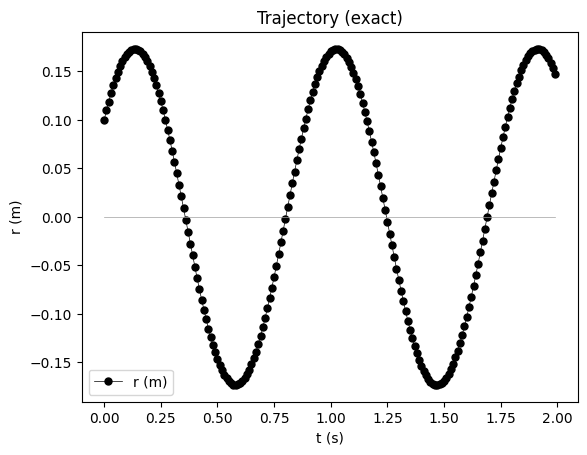

In [3]:
plt.plot(time, r, ".-", color='k', markersize=10, linewidth=0.5)
plt.legend(['r (m)'])

plt.plot(time, 0 * r, "-", color='#A0A0A0', linewidth=0.5)

plt.title('Trajectory (exact)')

plt.xlabel('t (s)')
plt.ylabel('r (m)')

plt.show()

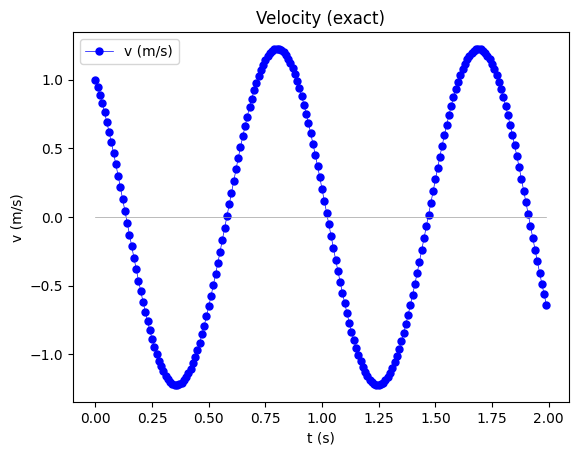

In [4]:
plt.plot(time, v, ".-", color='b', markersize=10, linewidth=0.5)
plt.legend(['v (m/s)'])

plt.plot(time, 0 * v, "-", color='#A0A0A0', linewidth=0.5)

plt.title('Velocity (exact)')

plt.xlabel('t (s)')
plt.ylabel('v (m/s)')

plt.show()

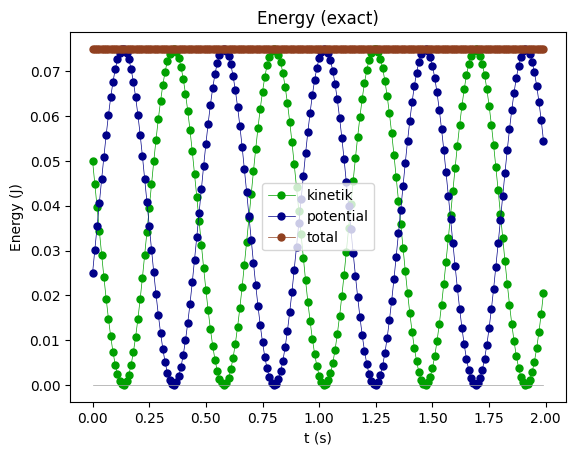

In [5]:
plt.plot(time, K, ".-", color='#00A000', markersize=10, linewidth=0.5)
plt.plot(time, U, ".-", color='#000088', markersize=10, linewidth=0.5)
plt.plot(time, E, ".-", color='#904020', markersize=10, linewidth=0.5)
plt.legend(['kinetik','potential','total'])

plt.plot(time, 0 * E, "-", color='#A0A0A0', linewidth=0.5)

plt.title('Energy (exact)')

plt.xlabel('t (s)')
plt.ylabel('Energy (J)')

plt.show()

## Euler scheme for the Harmonic Oscillator

For the harmonic oscillator, we have:

$$
    \left\{
    \begin{array}{ccl}
        \displaystyle r_{n+1} 
        & = & 
        \displaystyle r_n + v_n \Delta t 
        \\[5pt]
        \displaystyle v_{n+1} 
        & = & 
        \displaystyle v_n + \frac{k}{m} r_n \Delta t \\[5pt]
    \end{array}
    \right.
$$

Our initial conditions are $r_0$ and $v_0$.

Implement a function to simulate a harmonic oscillator with the Euler algorithm.

In [6]:
def euler_harmonic_oscillator(r0, v0, k, m, dt, duration):
    """
    Function generating the solution for the 1D harmonic oscillator with Euler 
    method.
    
    Parameters
    ==========
    r0 : Initial position of the oscillator [m].
    v0 : Initial velocity of the oscillator [m/s].
    k : Spring constant (stiffness) of the harmonic oscillator [N/m].
    m : Mass of the oscillator [kg].
    dt : Time step for the numerical solution [s].
    duration : Total time for which the solution is computed [s].
    """

    N = math.ceil(duration / dt)  # Number of time steps.

    time = np.zeros(N)
    
    r = np.zeros(N)  # Position.
    r[0] = r0  # Initital position.
    
    v = np.zeros(N)  # Velocity.
    v[0] = v0  # Initial velocity.

    for t in range(N - 1):
        time[t + 1] = dt * (t + 1)   
        r[t + 1] = r[t] + v[t] * dt
        v[t + 1] = v[t] - k * r[t] / m * dt

    K = 0.5 * m * v ** 2  # Kinetic energy.
    U = 0.5 * k * r ** 2  # Potential energy.
    E = K + U  # Total energy.

    return time, r, v, K, U, E, N


Perform the numerical simulation with the Euler algorithm.

In [7]:
# Parameters for the harmonic oscillator system.
k = 5  # Elastic constant [N/m].
m = 0.1  # Mass [kg].

r0 = 0.1  # Initial displacement [m].
v0 = 1  # Initial velocity [m].

dt = 0.01  # Time step [s].
duration = 2  # Total time [s].

# Simulation.
time, r, v, K, U, E, N = \
    euler_harmonic_oscillator(r0, v0, k, m, dt, duration)


Plot the evolution of various quantities.

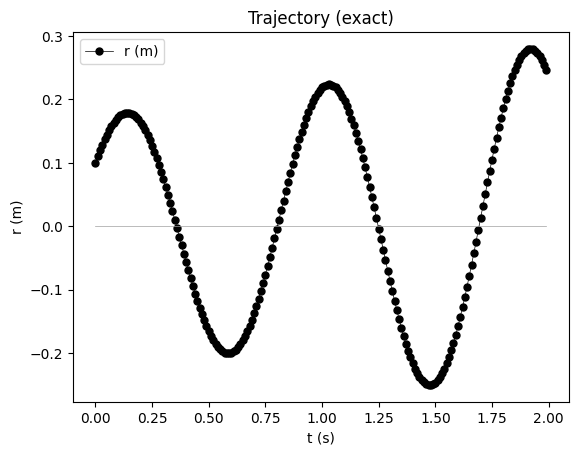

In [8]:
plt.plot(time, r, ".-", color='k', markersize=10, linewidth=0.5)
plt.legend(['r (m)'])

plt.plot(time, 0 * r, "-", color='#A0A0A0', linewidth=0.5)

plt.title('Trajectory (exact)')

plt.xlabel('t (s)')
plt.ylabel('r (m)')

plt.show()

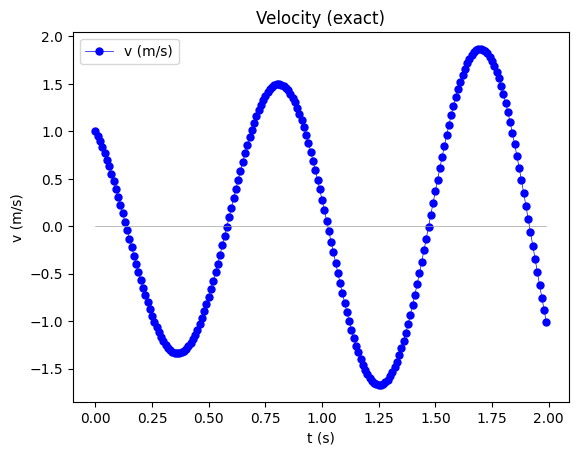

In [9]:
plt.plot(time, v, ".-", color='b', markersize=10, linewidth=0.5)
plt.legend(['v (m/s)'])

plt.plot(time, 0 * v, "-", color='#A0A0A0', linewidth=0.5)

plt.title('Velocity (exact)')

plt.xlabel('t (s)')
plt.ylabel('v (m/s)')

plt.show()

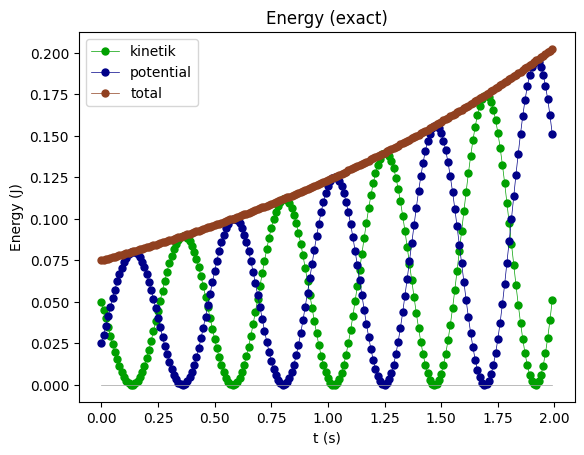

In [10]:
plt.plot(time, K, ".-", color='#00A000', markersize=10, linewidth=0.5)
plt.plot(time, U, ".-", color='#000088', markersize=10, linewidth=0.5)
plt.plot(time, E, ".-", color='#904020', markersize=10, linewidth=0.5)
plt.legend(['kinetik','potential','total'])

plt.plot(time, 0 * E, "-", color='#A0A0A0', linewidth=0.5)

plt.title('Energy (exact)')

plt.xlabel('t (s)')
plt.ylabel('Energy (J)')

plt.show()

## Leapfrog scheme for the Harmonic Oscillator

For the harmonic oscillator, we have:

$$
    \left\{
    \begin{array}{ccl}
        \displaystyle r_{n+\scriptstyle \frac{1}{2}} 
        & = & 
        \displaystyle r_n + v_n\, \frac{\Delta t}{2}
        \\[10pt]
        \displaystyle v_{n+1} 
        & = & 
        \displaystyle v_n + \frac{F_{n+\scriptstyle \frac{1}{2}}}{m}\, \Delta t 
        \\[10pt]
        \displaystyle r_{n+1} 
        & = & 
        \displaystyle r_{n+\scriptstyle \frac{1}{2}} + v_{n+1}\, \frac{\Delta t}{2}
        \\[10pt]
    \end{array}
    \right.
$$

Our initial conditions are $r_0$ and $v_0$.

Implement a function to simulate a harmonic oscillator with the leapfrog algorithm.

In [11]:
def leapfrog_harmonic_oscillator(r0, v0, k, m, dt, duration):
    """
    Function generating the solution for the 1D harmonic oscillator with 
    leapfrog method.

    Parameters
    ==========
    r0 : Initial position of the oscillator [m].
    v0 : Initial velocity of the oscillator [m/s].
    k : Spring constant (stiffness) of the harmonic oscillator [N/m].
    m : Mass of the oscillator [kg].
    dt : Time step for the numerical solution [s].
    duration : Total time for which the solution is computed [s].
    """

    N = math.ceil(duration / dt)  # Number of time steps.

    time = np.zeros(N)
    
    r = np.zeros(N)  # Position.
    r[0] = r0  # Initital position.
    
    v = np.zeros(N)  # Velocity.
    v[0] = v0  # Initial velocity.

    for t in range(N-1):
        r_half = r[t] + 0.5 * v[t] * dt  # Half time step.
        v[t + 1] = v[t] - k * r_half / m * dt    
        r[t + 1] = r_half + 0.5 * v[t + 1] * dt  
        time[t + 1] = dt * (t + 1)
     
    K = 0.5 * m * v ** 2  # Kinetic energy.
    U = 0.5 * k * r ** 2  # Potential energy.
    E = K + U  # Total energy.

    return time, r, v, K, U, E, N


Perform the numerical simulation with the leapfrog algorithm.

In [12]:
# Parameters for the harmonic oscillator system.
k = 5  # Elastic constant [N/m].
m = 0.1  # Mass [kg].

r0 = 0.1  # Initial displacement [m].
v0 = 1  # Initial velocity [m].

dt = 0.01  # Time step [s].
duration = 2  # Total time [s].

# Simulation.
time, r, v, K, U, E, N = \
    leapfrog_harmonic_oscillator(r0, v0, k, m, dt, duration)

Plot the evolution of various quantities.

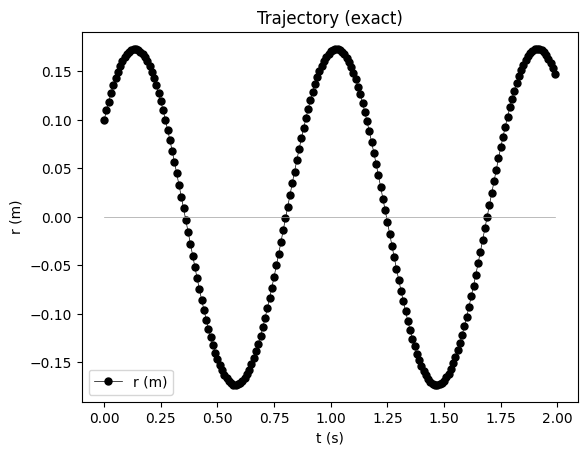

In [13]:
plt.plot(time, r, ".-", color='k', markersize=10, linewidth=0.5)
plt.legend(['r (m)'])

plt.plot(time, 0 * r, "-", color='#A0A0A0', linewidth=0.5)

plt.title('Trajectory (exact)')

plt.xlabel('t (s)')
plt.ylabel('r (m)')

plt.show()

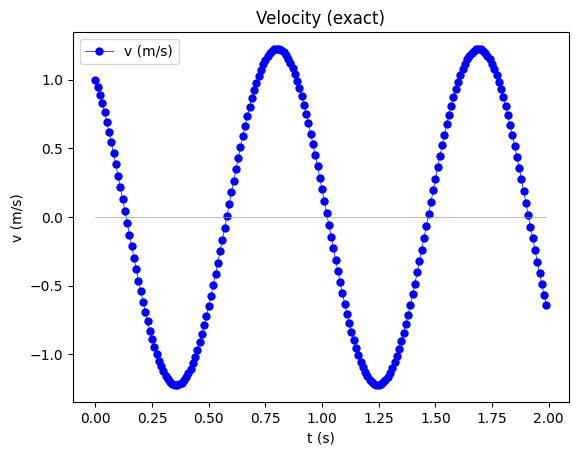

In [14]:
plt.plot(time, v, ".-", color='b', markersize=10, linewidth=0.5)
plt.legend(['v (m/s)'])

plt.plot(time, 0 * v, "-", color='#A0A0A0', linewidth=0.5)

plt.title('Velocity (exact)')

plt.xlabel('t (s)')
plt.ylabel('v (m/s)')

plt.show()

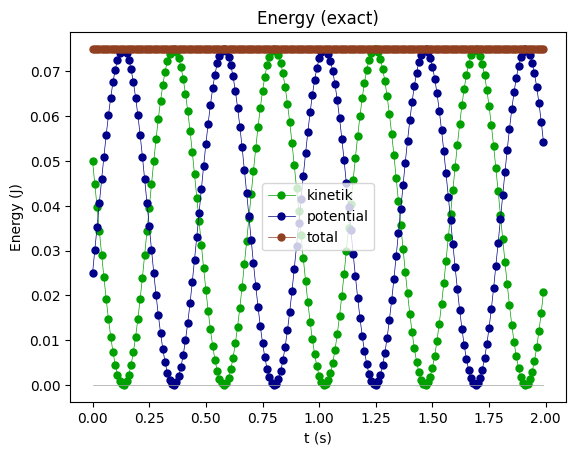

In [15]:
plt.plot(time, K, ".-", color='#00A000', markersize=10, linewidth=0.5)
plt.plot(time, U, ".-", color='#000088', markersize=10, linewidth=0.5)
plt.plot(time, E, ".-", color='#904020', markersize=10, linewidth=0.5)
plt.legend(['kinetik','potential','total'])

plt.plot(time, 0 * E, "-", color='#A0A0A0', linewidth=0.5)

plt.title('Energy (exact)')

plt.xlabel('t (s)')
plt.ylabel('Energy (J)')

plt.show()

## Multiple particles: The Lennard-Jones gas

This example is particularly meaningful because it shows how molecular dynamics works in cases of high interest for physics, chemistry, biology, ... 

In this case we simulate the Lennard-Jones gas.
This model is particularly interesting because, tuning the parameters, you can simulate an ensemble of *interacting* particles that can mimic solid, liquid, gas behaviour of matter!

We will simulate a situation which is closer to a gas: we will consider conditions of: 
- low density
- high energy per particle
which is what happens in a gas.

If you wish to explore further, you can set the system in condition of 
- higher density
- moderate energy per particle
and you will obtain something similar to a liquid!

If you want a crystalline solid, try 
- very high density
- very low energy per particle

Anyway, we will start with the **gas**.


### Lennard-Jones interaction potential
Given two particles, they interact with the following mutual potential (Lennard-Jones potential)
$$
    V(r) 
    =  
    4 \epsilon \left\lbrack \left(\frac{\sigma}{r} \right)^{12}- \left(\frac{\sigma}{r} \right)^{6} \right\rbrack,
$$
which is characterized by a characteristic interaction length $\sigma$ and energy $\epsilon$. The distance among the interacting particles is $r$.


<img src="ch01_fig05.png" alt="title" width="600px" />


The potential is attractive for distances in the range $[\sigma, 2\sigma]$, dies out after $2 \sigma$, and is very repulsive below $\sigma$. It's practically like a hard-core shell.


### Lennard-Jones interaction force

The interaction force is obtained from $F = -\nabla V$ and it's equal to

$$
    F(r) 
    =  
    24 \frac{\epsilon}{r} \left\lbrack 2 \left(\frac{\sigma}{r} \right)^{12}- \left(\frac{\sigma}{r} \right)^{6} \right\rbrack,
$$


### MD formalism for many particles

If there are more particles, the Newton's equations describing the system become:

$$
    \left\{
    \begin{array}{lcl}
        \displaystyle \frac{{\rm d}{{\bf r}_{i}(t)}}{{\rm d}t}
        & = & 
        {\bf v}_{i}(t) 
        \\[10pt]
        \displaystyle \frac{{\rm d}{{\bf v}_{i}(t)}}{{\rm d}t}
        & = & 
        \displaystyle \frac{{\bf F}_{i}}{m} 
        = 
        \displaystyle \frac{1}{m} \displaystyle \sum_{j\neq i}{\bf F}_{ij} 
        \\[5pt]
        {\bf r}_i(0) & = & {\bf r}_{i0} 
        \\[5pt]
        {\bf v}_i(0) & = & {\bf v}_{i0} 
    \end{array}
    \right.
$$

Note the interaction force term $\sum_{j\neq i}{\bf F}_{ij}$.

Note that this time we are in 2 dimensions: we have an $x$ component and a $y$ component.



## Simple implementation of Lennard-Jones gas in 2 dimensions

In this implementation we start with a small number of particles (N=36)
and we but them in a box with *reflecting boundary conditions*, i.e., a particle hitting one side of the box bounces back as in a perfect elastic collision (no energy is lost in the process).

We use the following parameters for the particle:

$$
    \left\{
    \begin{array}{ccl}
        m & = & 1\, \\
        \sigma & = & 1\, \\
        \epsilon & = & 1\, \\
        v_0 & = & 2\, 
    \end{array}
    \right.
$$

and choose $\Delta t = 0.001$ (for this initial trial).

The size of the box will be $L = 100$ .

We are going to use a **leapfrog** scheme.

Note: read carefully the text of **Exercise 1.6** and the part regarding the *dimensionless units* for Lennard Jones.






## Lennard-Jones gas simulation


2 dimensions

Approx 100 particles in a box with reflecting boundary conditions.

### Caveat

- cut-off radius for the force calculation 

- initial speed of the particles

- randomization of positions and directions

- initial removal of "overlap" 

- choice of the time step


Define the parameters of the simulation.

In [16]:
# Parameters for the Lennard-Jones gas.
m = 1  # Mass (units of m0).
sigma = 1  # Size (units of sigma0).
eps = 1  # Energy (unit of epsilon0).
v0 = 1  # Initial speed (units of v0 = sqrt((2 * epsilon0) / m0)).

# Parameters for the simulation.
N_particles = 100  # Number of particles.

dt = 0.001   # Time step (units of t0 = sigma * sqrt(m0 /(2 * epsilon0))).

L = 100  # Box size (units of sigma0).
x_min, x_max, y_min, y_max = -L/2, L/2, -L/2, L/2

cutoff_radius = 5 * sigma  # Cutoff_radius for neighbours list.

Initialize the simulation.

In [17]:
# Generate initial positions on a grid and orientations at random.
x0, y0 = np.meshgrid(
    np.linspace(- L / 2, L / 2, int(np.sqrt(N_particles))),
    np.linspace(- L / 2, L / 2, int(np.sqrt(N_particles))),
)
x0 = x0.flatten()[:N_particles]
y0 = y0.flatten()[:N_particles]
phi0 = (2 * np.random.rand(N_particles) - 1) * np.pi

# Initialize the neighbour list.
def list_neighbours(x, y, N_particles, cutoff_radius):
    '''Prepare a neigbours list for each particle.'''
    neighbours = []
    neighbour_number = []
    for j in range(N_particles):
        distances = np.sqrt((x - x[j]) ** 2 + (y - y[j]) ** 2)
        neighbor_indices = np.where(distances <= cutoff_radius)
        neighbours.append(neighbor_indices)
        neighbour_number.append(len(neighbor_indices))
    return neighbours, neighbour_number

neighbours, neighbour_number = list_neighbours(x0, y0, N_particles, cutoff_radius)

# Initialize the variables for the leapfrog algorithm.
# Current time srep.
x = x0
y = y0
x_half = np.zeros(N_particles)
y_half = np.zeros(N_particles)
v = v0
phi = phi0
vx = v0 * np.cos(phi0)
vy = v0 * np.sin(phi0)

# Next time step.
nx = np.zeros(N_particles)
ny = np.zeros(N_particles)
nv = np.zeros(N_particles)
nphi = np.zeros(N_particles)
nvx = np.zeros(N_particles)
nvy = np.zeros(N_particles)


Define a function to calculate the force between two particles.

In [18]:
def total_force_cutoff(x, y, N_particles, sigma, epsilon, neighbours):
    '''
    Calculate the total force on each particle due to the interaction with a 
    neighbours list with the particles interacting through a Lennard-Jones 
    potential.
    '''
    Fx = np.zeros(N_particles)
    Fy = np.zeros(N_particles)
    for i in range(N_particles):
        for j in list(neighbours[i][0]):
            if i != j:
                r2 = (x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2
                r = np.sqrt(r2)
                ka2 = sigma ** 2 / r2
                
                # Force on i due to j.
                F = 24 * epsilon / r * (2 * ka2 ** 6 - ka2 ** 3)  # Modulus.
                
                Fx[i] += F * (x[i] - x[j]) / r
                Fy[i] += F * (y[i] - y[j]) / r
    return Fx, Fy

Perform the simulation.

In [19]:
import time
from scipy.constants import Boltzmann as kB 
from tkinter import *

window_size = 600

tk = Tk()
tk.geometry(f'{window_size + 20}x{window_size + 20}')
tk.configure(background='#000000')

canvas = Canvas(tk, background='#ECECEC')  # Generate animation window 
tk.attributes('-topmost', 0)
canvas.place(x=10, y=10, height=window_size, width=window_size)

specialparticle = canvas.create_oval(
    (x[0] - sigma / 2) / L * window_size + window_size / 2, 
    (y[0] - sigma / 2) / L * window_size + window_size / 2,
    (x[0] + sigma / 2) / L * window_size + window_size / 2, 
    (y[0] + sigma / 2) / L * window_size + window_size / 2,
    outline='#000000', 
    fill='#000000',
)

particles = []
for j in range(1, N_particles):
    particles.append(
        canvas.create_oval(
            (x[j] - sigma / 2) / L * window_size + window_size / 2, 
            (y[j] - sigma / 2) / L * window_size + window_size / 2,
            (x[j] + sigma / 2) / L * window_size + window_size / 2, 
            (y[j] + sigma / 2) / L * window_size + window_size / 2,
            outline='#00C0C0', 
            fill='#00C0C0',
        )
    )

step = 0

def stop_loop(event):
    global running
    running = False
tk.bind("<Escape>", stop_loop)  # Bind the Escape key to stop the loop.
running = True  # Flag to control the loop.
while running:
    x_half = x + 0.5 * vx * dt      
    y_half = y + 0.5 * vy * dt      

    fx, fy = \
        total_force_cutoff(x_half, y_half, N_particles, sigma, eps, neighbours)
    
    nvx = vx + fx / m * dt
    nvy = vy + fy / m * dt
        
    nx = x_half + 0.5 * nvx * dt
    ny = y_half + 0.5 * nvy * dt       
    
    # Reflecting boundary conditions.
    for j in range(N_particles):
        if nx[j] < x_min:
            nx[j] = x_min + (x_min - nx[j])
            nvx[j] = - nvx[j]

        if nx[j] > x_max:
            nx[j] = x_max - (nx[j] - x_max)
            nvx[j] = - nvx[j]

        if ny[j] < y_min:
            ny[j] = y_min + (y_min - ny[j])
            nvy[j] = - nvy[j]
            
        if ny[j] > y_max:
            ny[j] = y_max - (ny[j] - y_max)
            nvy[j] = - nvy[j]
    
    nv = np.sqrt(nvx ** 2 + nvy ** 2)
    for i in range(N_particles):
        nphi[i] = math.atan2(nvy[i], nvx[i])
    
    # Update neighbour list.
    if step % 10 == 0:
        neighbours, neighbour_number = \
            list_neighbours(nx, ny, N_particles, cutoff_radius)

    # Update variables for next iteration.
    x = nx
    y = ny
    vx = nvx
    vy = nvy
    v = nv
    phi = nphi
        
    # Update animation frame.
    if step % 100 == 0:        
        canvas.coords(
            specialparticle,
            (nx[0] - sigma / 2) / L * window_size + window_size / 2,
            (ny[0] - sigma / 2) / L * window_size + window_size / 2,
            (nx[0] + sigma / 2) / L * window_size + window_size / 2,
            (ny[0] + sigma / 2) / L * window_size + window_size / 2,
        )
        for j, particle in enumerate(particles):
            canvas.coords(
                particle,
                (nx[j + 1] - sigma / 2) / L * window_size + window_size / 2,
                (ny[j + 1] - sigma / 2) / L * window_size + window_size / 2,
                (nx[j + 1] + sigma / 2) / L * window_size + window_size / 2,
                (ny[j + 1] + sigma / 2) / L * window_size + window_size / 2,
            )
                    
        tk.title(f'Time {step * dt:.1f} - Iteration {step}')
        tk.update_idletasks()
        tk.update()
        time.sleep(.001)  # Increase to slow down the simulation.    

    step += 1

tk.update_idletasks()
tk.update()
tk.mainloop()  # Release animation handle (close window to finish).